# 4 Bins Equal Spacing

This notebook contains plots for the 4 bins equal spacing case

## Setup

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data
First we load in the C_ells and orderings into a dataframe

In [60]:
c_ells = np.loadtxt("../out_w0_sn_all/equal_space/4_bins/Cl_fid.dat")
orderings = np.loadtxt("../out_w0_sn_all/equal_space/4_bins/ordering_fid.dat")
orderings_str = ["%dx%d"%(order[0], order[1]) for order in orderings]

c_ell_df = pd.DataFrame(data=c_ells, columns=["ell"]+[i+r' $C_\ell$' for i in orderings_str]).\
              set_index("ell")

Now we load the signal to noise ratio of the $w_0$ parameter as per Kitching into another dataframe

In [3]:
sn_vs_delta = np.loadtxt("../out_sn_vs_delta/equal_space/4_bins/sn_vs_delta.dat")
sn_df = pd.DataFrame(sn_vs_delta, columns=["Delta", "Signal to Noise Ratio"]).set_index("Delta")
sn_df["Signal to Noise Ratio - Relative"] = sn_df["Signal to Noise Ratio"]/sn_df["Signal to Noise Ratio"].iloc[-1]

## Plots
### Data Vector
First, a plot of the $C_\ell$'s where 

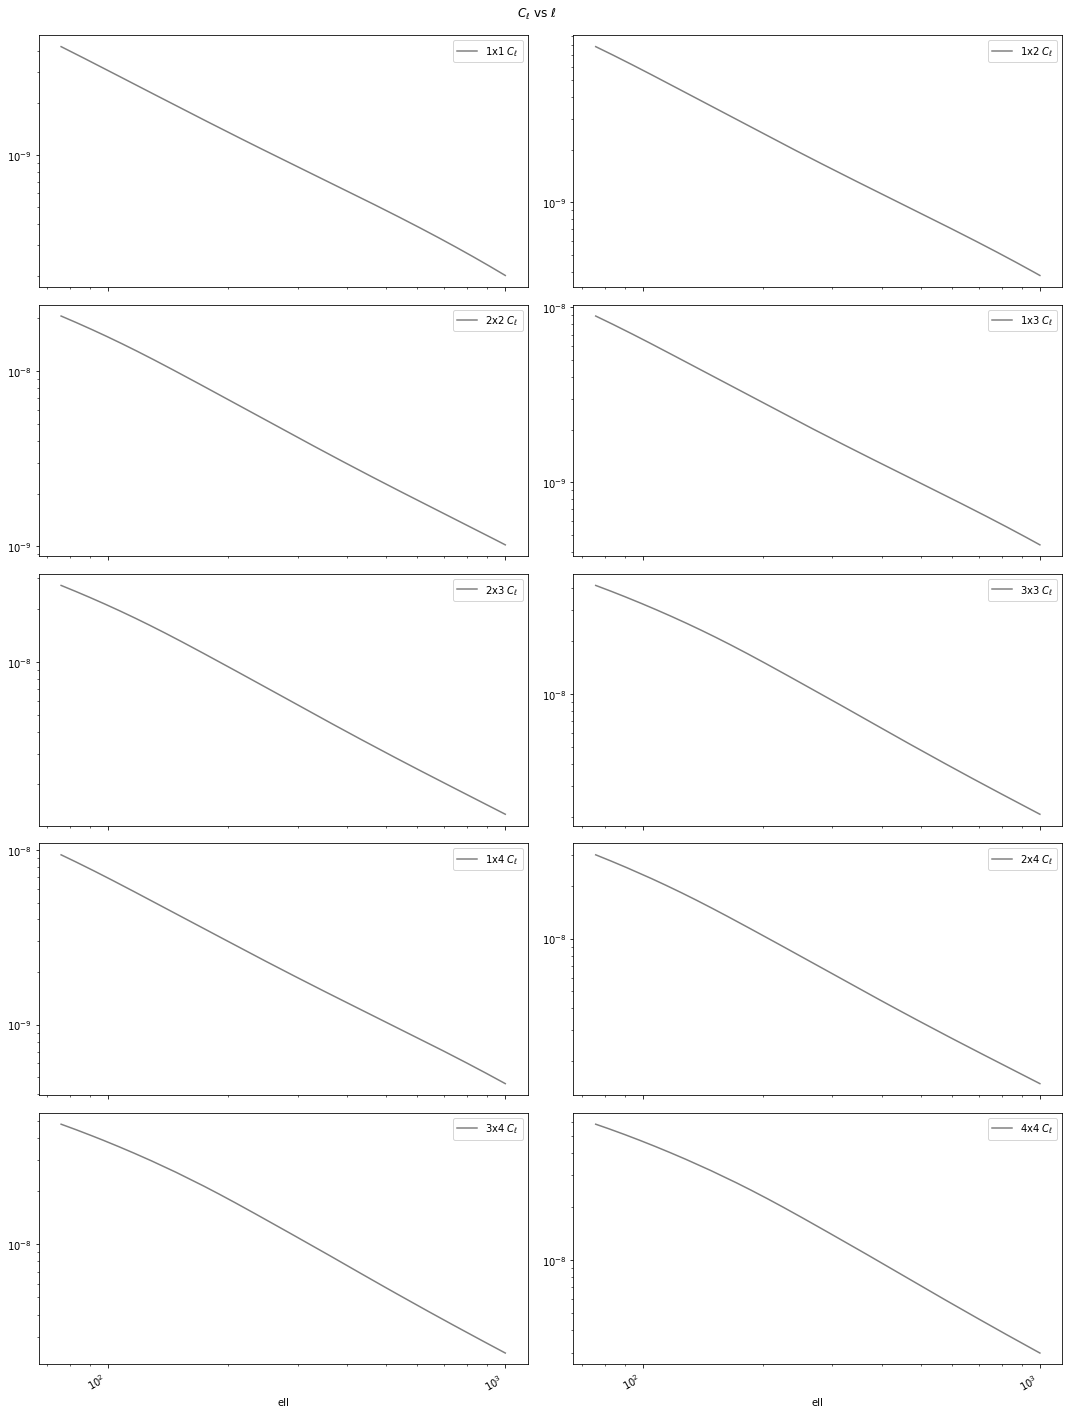

In [67]:
c_ell_df.plot(loglog=True, subplots=True, layout=(5,2), figsize=(15,20), color='grey', title=r'$C_\ell$ vs $\ell$')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

### Tuning
Now we plot the signal to noise ratio of the $w_0$ paramater against the tuning derivative tuning parameter $\Delta$ which represents the fractional step size being used to calculate the 3 point stencil

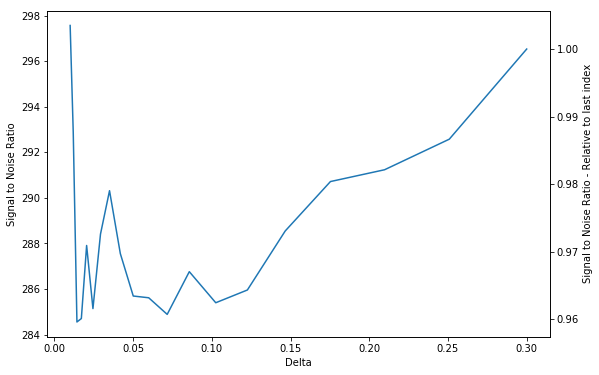

In [6]:
ax = sn_df.plot(figsize=(9, 6), y=["Signal to Noise Ratio"], legend=False)
plt.ylabel("Signal to Noise Ratio")
sn_df.plot(ax=ax, y="Signal to Noise Ratio - Relative", secondary_y=True, legend=False, alpha=0)
plt.xlabel("Delta")
plt.ylabel("Signal to Noise Ratio - Relative to last index")
plt.show()

### Benchmark
Now we plot both $\left(\frac{\partial C_\ell}{\partial w_0}\right)^2$ and
$\left(C_\ell + N\right)^2$, which go into the signal to noise ratio caclulation.

We choose a delta of 0.1

In [74]:
deriv = np.loadtxt("../out_w0_sn_all/equal_space/4_bins/lensing_bins_4_delta_1.02485379e-01/deriv_w0.dat")
deriv_df = pd.DataFrame(data=deriv, columns=["ell"]+[i+r' $\left(\frac{\partial C_\ell}{\partial w_0}\right)^2$' for i in orderings_str]).\
              set_index("ell")
num_dens = np.loadtxt("../out_w0_sn_all/equal_space/4_bins/num_dens_lensing.dat")
autocorr_inds = [i for i, order in enumerate(orderings) if order[0]==order[1]]
c_ell_plus_n_sq_df = (c_ell_df.iloc[:, autocorr_inds] + num_dens)**2
c_ell_plus_n_sq_df.columns = [i[:5] + r'\left('+i[5:-1] + r'+N\right)^2' + i[-1:] for i in c_ell_plus_n_sq_df.columns]

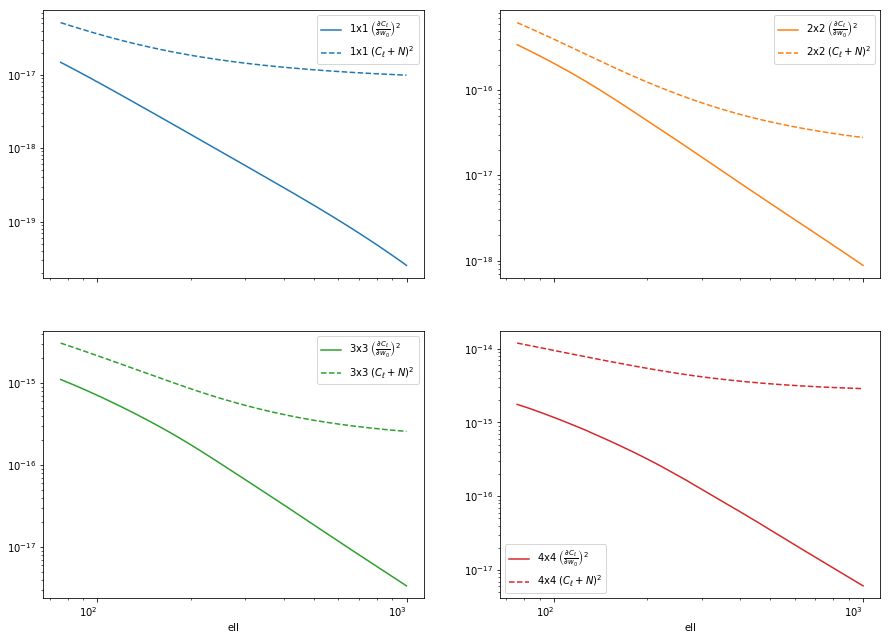

In [75]:
ax = (deriv_df.iloc[:, autocorr_inds]**2).plot(loglog=True, subplots=True, layout=(2,2), figsize=(15,12))
c_ell_plus_n_sq_df.plot(ax=ax, loglog=True, subplots=True, layout=(2,2), style='--');